![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Getting started with Tableau

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Load the dataset into a notebook.
2. Create a barplot of the number of customers per **Gender**.
3. Create a barplot of the number of customers per **EmploymentStatus** and **Gender**.
4. Identify **Measurements** and **Dimensions**. Are they the same as the ones in your Pandas dataframe? Modify accordingly.
5. Save as `unit-4-lab.tbwx`.


## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

## Loading data

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# Make headers snake case aka PEP 8
data.columns = [x.lower() for x in data.columns]
data.columns = data.columns.str.replace("[ ]", "_", regex=True)

# Check that everything has been reformatted properly
list(data.columns)

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

2. Create a barplot of the number of customers per **Gender**.

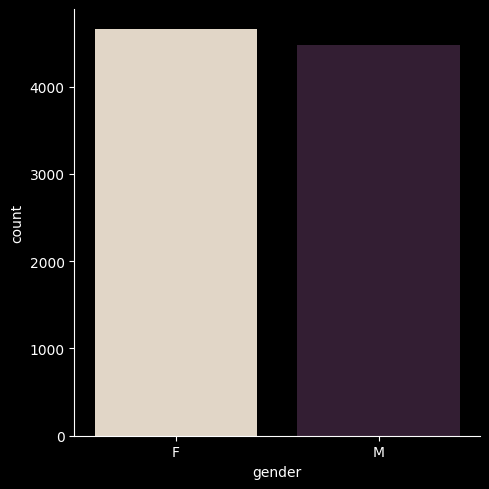

In [10]:
sns.catplot(data=data, x="gender", kind="count", palette="ch:.25")


3. Create a barplot of the number of customers per **EmploymentStatus** and **Gender**.


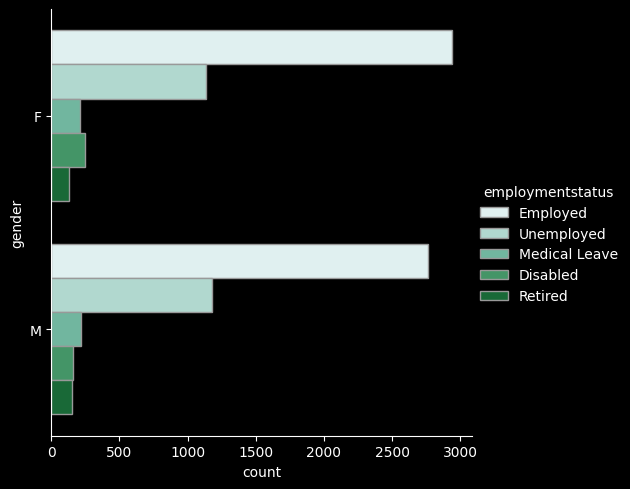

In [12]:
sns.catplot(
    data=data, y="gender", hue="employmentstatus", kind="count",
    palette="BuGn", edgecolor=".6",
)

#source: http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot
#source: https://www.practicalpythonfordatascience.com/ap_seaborn_palette

3. Create a barplot of the number of customers per **EmploymentStatus** and **Gender** using Tableau.


![convert notebook to web app](https://raw.githubusercontent.com/ocaoimh/data_bootcamp_assignments-/main/lab-week-11-tableau/tableau.png)


4. Identify **Measurements** and **Dimensions**. Are they the same as the ones in your Pandas dataframe? Modify accordingly.


<div style="color:red;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:80%;
           font-family:Courier;
           letter-spacing:0.5px">

<p style="padding: 20px;">Dimensions contain qualitative values (such as names, dates, or geographical data). You can use dimensions to categorize, segment, and reveal the details in your data. Dimensions affect the level of detail in the view. Measures contain numeric, quantitative values that you can measure.
</p>
</div>

In [15]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

<blockquote style="background-color: #e9c0f2; color: black; border-color: #c3b5e8; padding: 10px; border-radius: 5px;">
    
The table below shows that the datatypes are similar except for 3 differences:
1. The variable 'effective_to_date' is converted to a date format by Tableau and left as a number in pandas
2. Latitude and Longitude are generated by Tableau and do not exist in pandas
3. The variable 'state' is classed as a string and a geographical variable by Tableau 
    
_____________
</blockquote>

| Variable                      | Data type in pandas | Data type in Tableau               |
| ----------------------------- | ------------------- | ---------------------------------- |
| coverage                      | float64             | string                             |
| customer                      | float64             | string                             |
| customer_lifetime_value       | int64               | string                             |
| education                     | int64               | string                             |
| effective_to_date             | int64               | date                               |
| employmentstatus              | int64               | string                             |
| gender                        | int64               | string                             |
| income                        | int64               | numerical (whole)                  |
| location_code                 | object              | string                             |
| marital_status                | object              | string                             |
| monthly_premium_auto          | object              | numerical (whole)                  |
| months_since_last_claim       | object              | numerical (whole)                  |
| months_since_policy_inception | object              | numerical (whole)                  |
| number_of_open_complaints     | object              | numerical (whole)                  |
| number_of_policies            | object              | numerical (whole)                  |
| policy                        | object              | string                             |
| policy_type                   | object              | string                             |
| renew_offer_type              | object              | string                             |
| response                      | object              | string                             |
| sales_channel                 | object              | string                             |
| state                         | object              | Geographic values (used with maps) |
| total_claim_amount            | object              | numerical (whole)                  |
| vehicle_class                 | object              | string                             |
| vehicle_size                  | object              | string                             |
| Latitude                      | not present         | Geographic values (used with maps) |
| Longitude                     | not present         | Geographic values (used with maps) |